In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("sales.csv")

In [4]:
df.head()

,City,Customer type,Gender,Product line,Offers,Tax,Total,Profit,Payment,Rating
0,Hyderabad,Gold,Female,Health and Beauty,September,65.026000,1300.5200,122.83,Ewallet,9.1
1,Mumbai,Normal,Female,Electronic Accessories,July,175.020500,3500.4100,746.40,Cash,9.6
2,Delhi,Silver,Male,Home and Lifestyle,July,15.010500,300.2100,24.31,Credit card,7.4
3,Chennai,Platinum,Male,Health and Beauty,September,44.755000,895.1000,165.76,Ewallet,8.4
4,Chennai,Silver,Male,Sports,March,41.718925,834.3785,104.17,Ewallet,5.3


In [5]:
df.isna().sum()

City             3
Customer type    4
Gender           5
Product line     3
Offers           3
Tax              0
Total            0
Profit           0
Payment          2
Rating           2
dtype: int64

In [6]:
(df.isna().sum()/df.shape[0])*100

City             3.030303
Customer type    4.040404
Gender           5.050505
Product line     3.030303
Offers           3.030303
Tax              0.000000
Total            0.000000
Profit           0.000000
Payment          2.020202
Rating           2.020202
dtype: float64

Since the percentage of null values is not less we will fill all the columns having null values with appropriate values.

In [7]:
import pandas as pd

mode_city = df['City'].mode()[0]

df['City'].fillna(mode_city, inplace=True)

In [8]:
import pandas as pd

mode_customer_type= df['Customer type'].mode()[0]

df['Customer type'].fillna(mode_customer_type, inplace=True)

In [9]:
import pandas as pd

mode_gender= df['Gender'].mode()[0]

df['Gender'].fillna(mode_gender, inplace=True)

In [10]:
import pandas as pd

mode_product_line= df['Product line'].mode()[0]

df['Product line'].fillna(mode_product_line, inplace=True)

In [11]:
import pandas as pd

mode_offers= df['Offers'].mode()[0]

df['Offers'].fillna(mode_offers, inplace=True)

In [12]:
import pandas as pd

mode_payment= df['Payment'].mode()[0]

df['Payment'].fillna(mode_payment, inplace=True)

In [13]:
import pandas as pd

mean_rating= df['Rating'].mean()

df['Rating'].fillna(mean_rating, inplace=True)

In [14]:
df['Product line'].value_counts()

Product line
Health and Beauty         25
Sports                    19
Electronic Accessories    15
Food and Beverages        15
Home and Lifestyle        13
Fashion Accessories       12
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
Female    57
Male      42
Name: count, dtype: int64

In [16]:
df.isna().sum()

City             0
Customer type    0
Gender           0
Product line     0
Offers           0
Tax              0
Total            0
Profit           0
Payment          0
Rating           0
dtype: int64

Now there are no null values in our dataset. Now lets check for duplicated values

In [17]:
df.duplicated().sum()

0

As we can see there are no duplicate values in our dataset

Now we store this cleaned csv

In [18]:
df.to_csv("cleaned.csv")

In [19]:
df=pd.read_csv("cleaned.csv")
df.head()

,Unnamed: 0,City,Customer type,Gender,Product line,Offers,Tax,Total,Profit,Payment,Rating
0,0,Hyderabad,Gold,Female,Health and Beauty,September,65.026000,1300.5200,122.83,Ewallet,9.1
1,1,Mumbai,Normal,Female,Electronic Accessories,July,175.020500,3500.4100,746.40,Cash,9.6
2,2,Delhi,Silver,Male,Home and Lifestyle,July,15.010500,300.2100,24.31,Credit card,7.4
3,3,Chennai,Platinum,Male,Health and Beauty,September,44.755000,895.1000,165.76,Ewallet,8.4
4,4,Chennai,Silver,Male,Sports,March,41.718925,834.3785,104.17,Ewallet,5.3


Now to confirm that our dataset has no null values

In [20]:
df.isna().sum()

Unnamed: 0       0
City             0
Customer type    0
Gender           0
Product line     0
Offers           0
Tax              0
Total            0
Profit           0
Payment          0
Rating           0
dtype: int64

In [21]:
df.duplicated().sum()

0

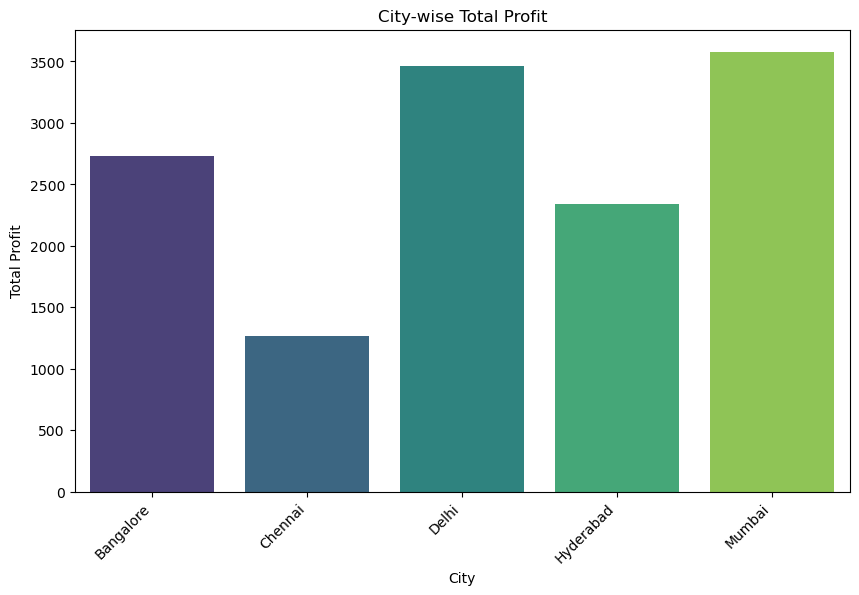

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

city_profit = df.groupby('City')['Profit'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Profit', data=city_profit, palette='viridis')
plt.title('City-wise Total Profit')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')  

# Show the plot
plt.show()


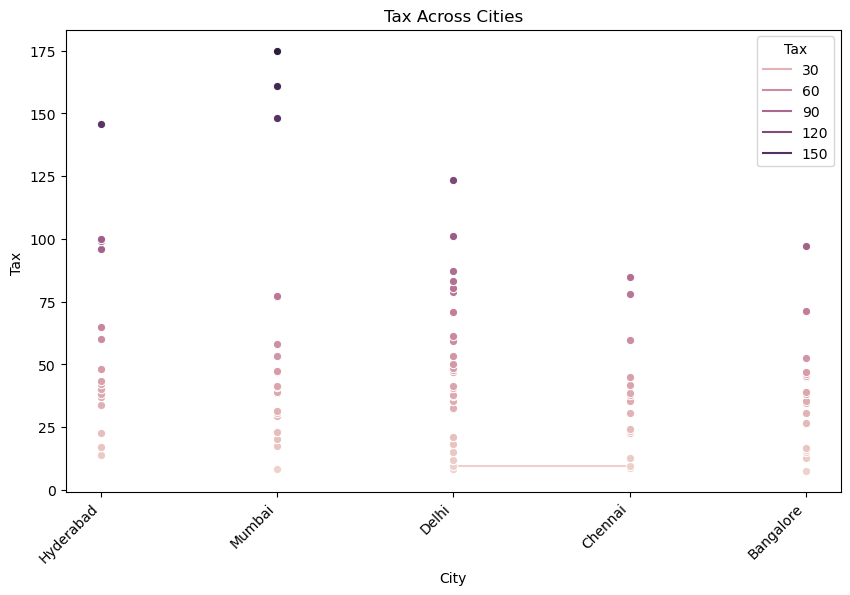

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'City' and 'Tax 5%' are columns in your DataFrame
# Replace 'your_dataframe' with the actual name of your DataFrame

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='City', y='Tax',hue='Tax', data=df, marker='o', color='b')
plt.title('Tax Across Cities')
plt.xlabel('City')
plt.ylabel('Tax ')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

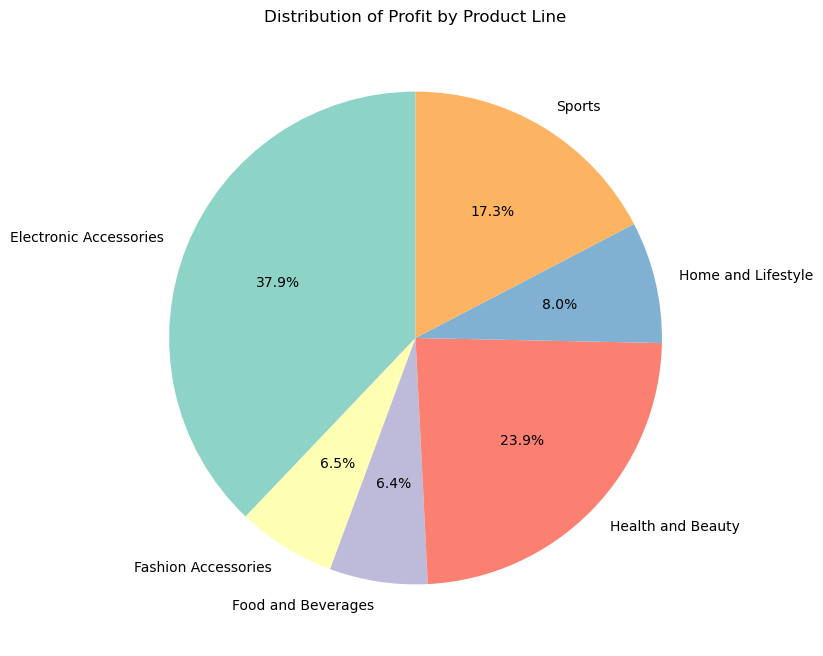

In [32]:
import matplotlib.pyplot as plt


product_line_profit = df.groupby('Product line')['Profit'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(product_line_profit['Profit'], labels=product_line_profit['Product line'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Distribution of Profit by Product Line')
plt.show()


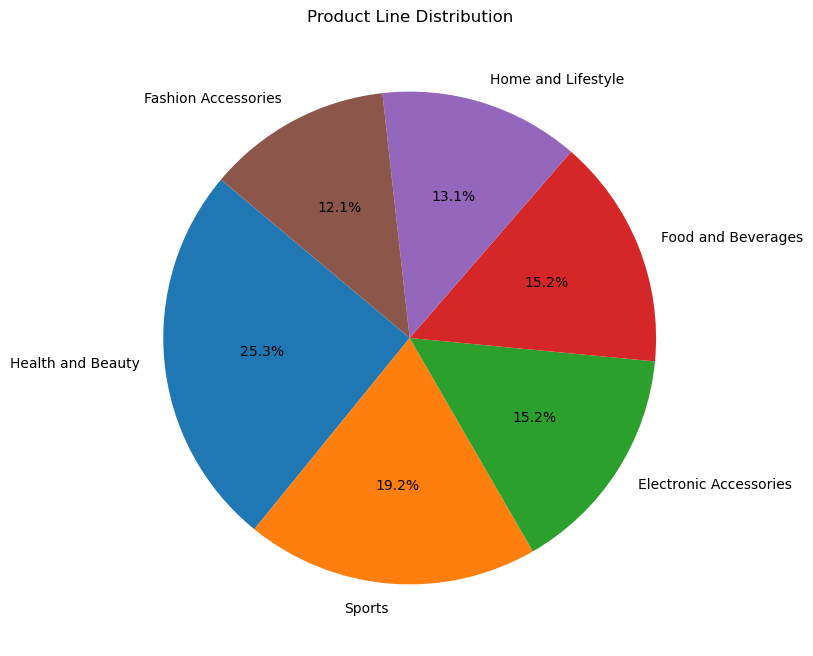

In [34]:
import matplotlib.pyplot as plt
# Assuming 'Product line' is a column in your DataFrame
# Replace 'your_dataframe' with the actual name of your DataFrame
# Calculate the distribution of product lines
product_line_distribution = df['Product line'].value_counts()
# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(product_line_distribution, labels=product_line_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Product Line Distribution')
plt.show()

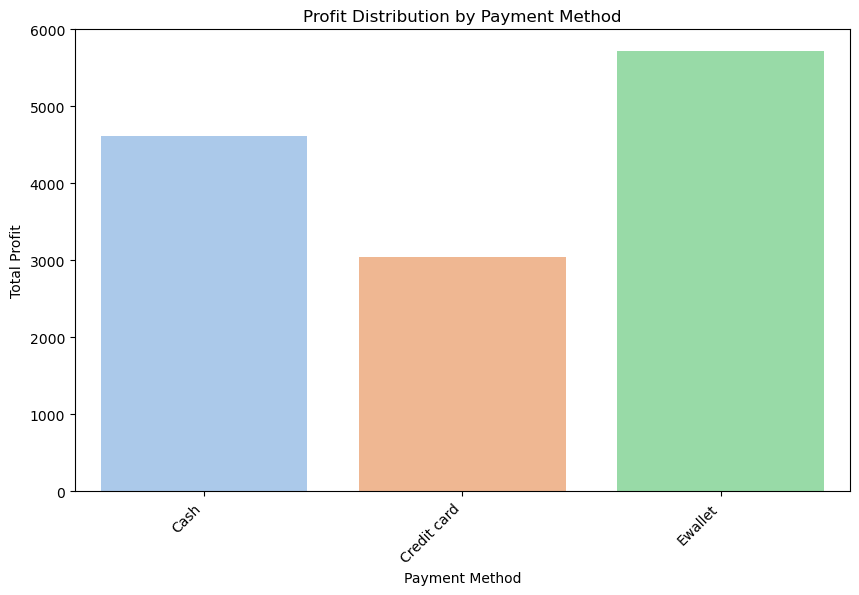

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your cleaned DataFrame

# Group by payment method and calculate total profit
payment_profit = df.groupby('Payment')['Profit'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment', y='Profit', data=payment_profit, palette='pastel')
plt.title('Profit Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


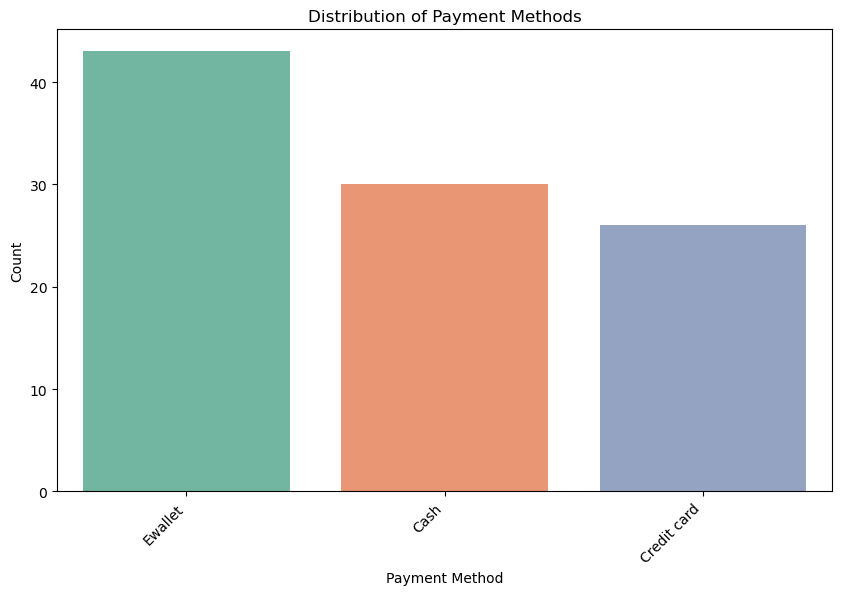

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your cleaned DataFrame

# Create a countplot for Payment Method
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment', data=df, palette='Set2')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


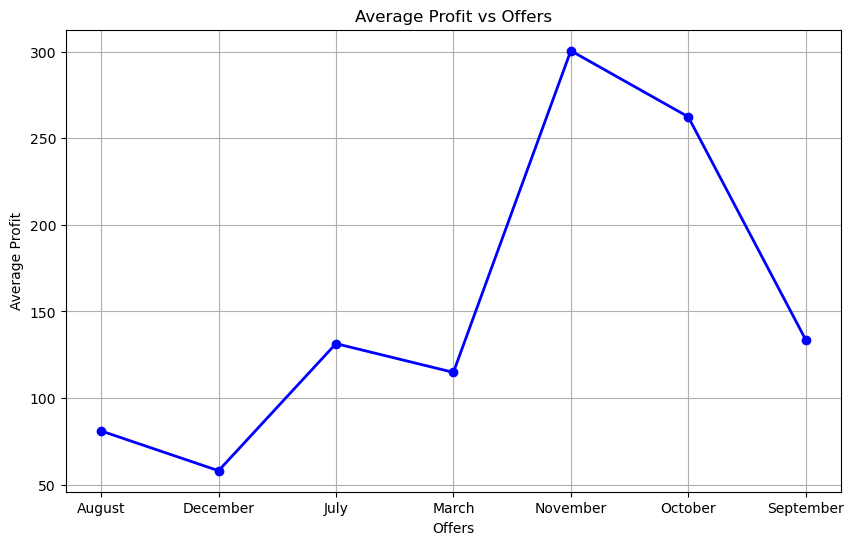

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate average profit per offer type
avg_profit = df.groupby('Offers')['Profit'].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_profit['Offers'], avg_profit['Profit'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.xlabel('Offers')
plt.ylabel('Average Profit')
plt.title('Average Profit vs Offers')
plt.grid(True)
plt.show()

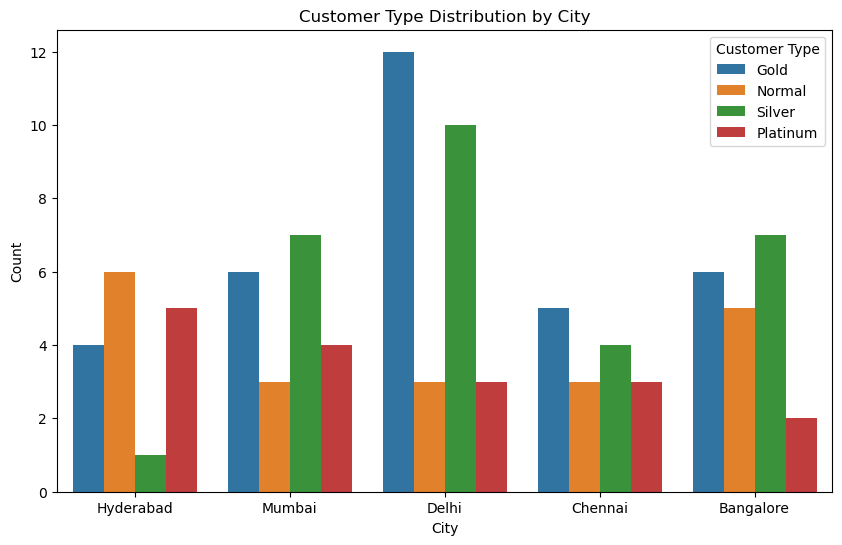

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'City' and 'Customer type' are columns in your DataFrame
# Replace 'your_dataframe' with the actual name of your DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='City', hue='Customer type', data=df)
plt.title('Customer Type Distribution by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Customer Type')
plt.show()

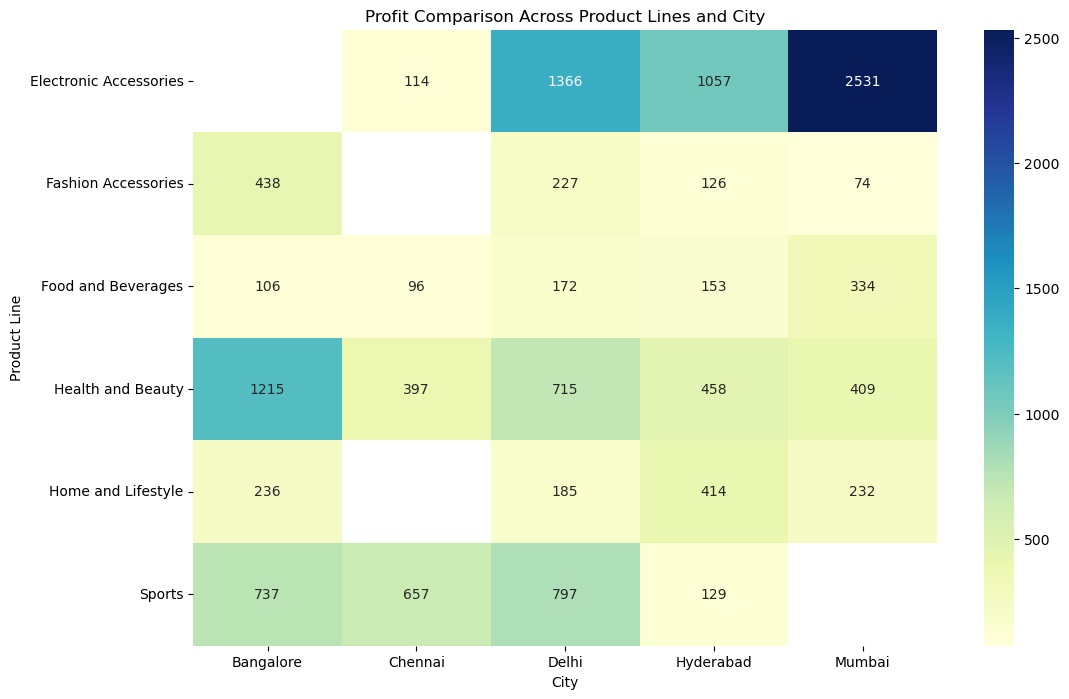

In [42]:
# Create a pivot table for heatmap
pivot_data = df.pivot_table(index='Product line', columns='City', values='Profit', aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.xlabel('City')
plt.ylabel('Product Line')
plt.title('Profit Comparison Across Product Lines and City')
plt.show()

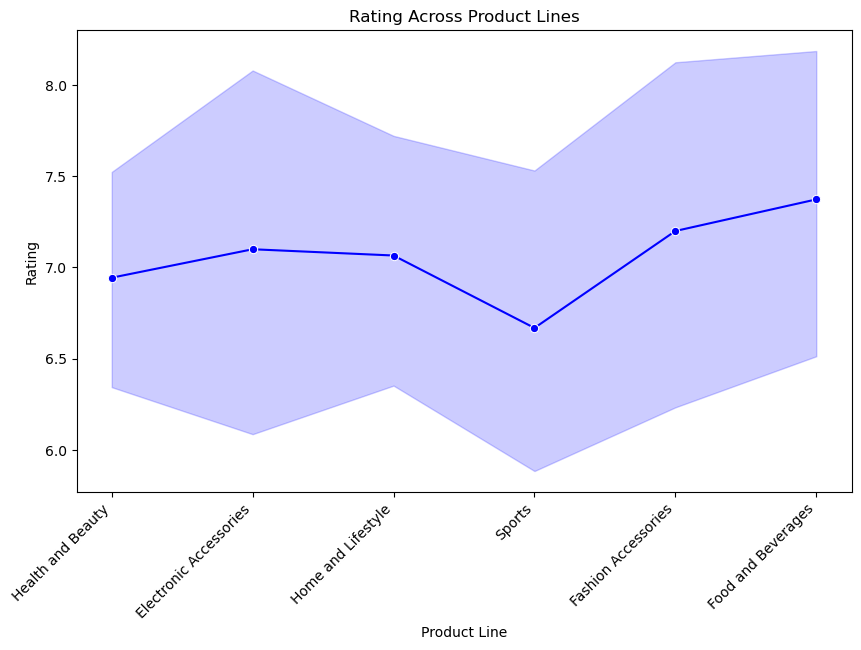

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Product line' and 'Rating' are columns in your DataFrame
# Replace 'your_dataframe' with the actual name of your DataFrame

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Product line', y='Rating', data=df, marker='o', color='b')
plt.title('Rating Across Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

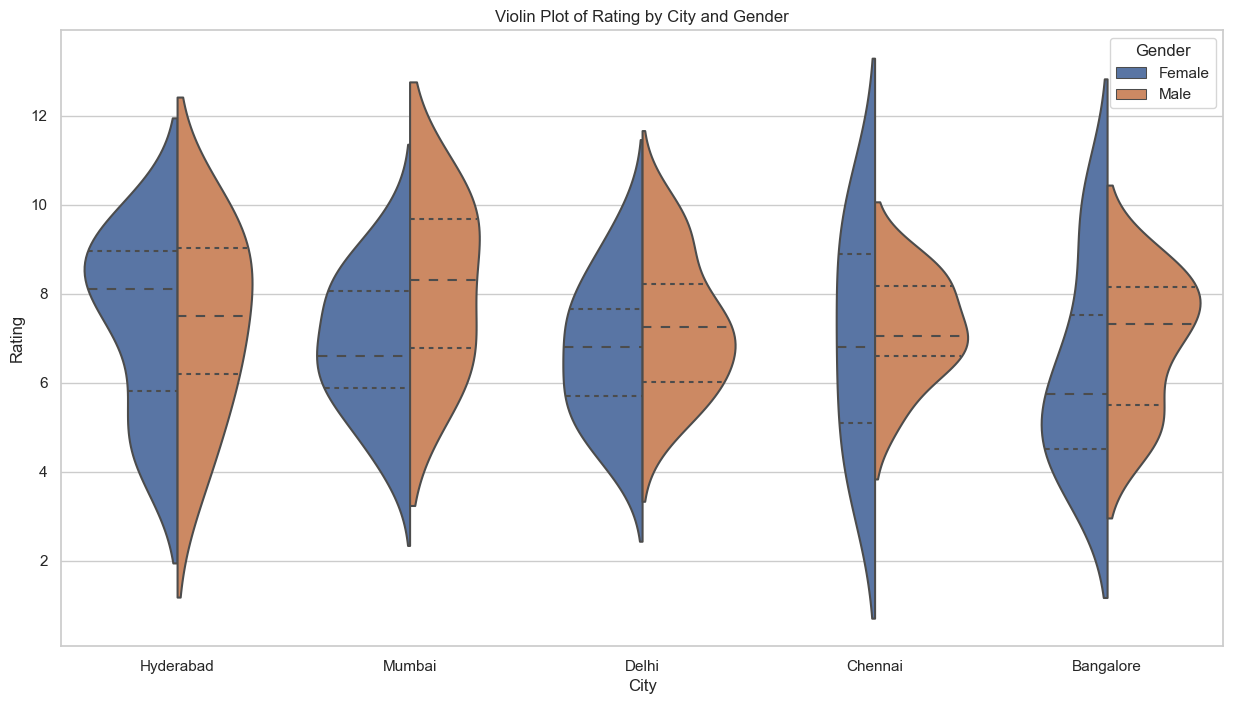

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named 'df'
# Replace 'df' with your actual DataFrame name

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(x="City", y="Rating", hue="Gender", data=df, split=True, inner="quart")

# Customize the plot
plt.title("Violin Plot of Rating by City and Gender")
plt.xlabel("City")
plt.ylabel("Rating")
plt.legend(title="Gender", loc="upper right")

# Show the plot
plt.show()

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named 'df'
# Replace 'df' with your actual DataFrame name

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(x="City", y="Rating", hue="Gender", data=df, split=True, inner="quart")

# Customize the plot
plt.title("Violin Plot of Rating by City and Gender")
plt.xlabel("City")
plt.ylabel("Rating")
plt.legend(title="Gender", loc="upper right")

# Show the plot
plt.show()

NameError: name 'df' is not defined

<Figure size 1500x800 with 0 Axes>